In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

In [22]:
train = pd.read_csv("./data/spaceship-titanic/train.csv")
test = pd.read_csv("./data/spaceship-titanic/test.csv")

val = train[:len(train)//10]
train = train[len(train)//10:]
len(train)+len(val),len(test)

(8693, 4277)

In [23]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824 entries, 869 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7824 non-null   object 
 1   HomePlanet    7646 non-null   object 
 2   CryoSleep     7629 non-null   object 
 3   Cabin         7652 non-null   object 
 4   Destination   7658 non-null   object 
 5   Age           7670 non-null   float64
 6   VIP           7636 non-null   object 
 7   RoomService   7662 non-null   float64
 8   FoodCourt     7655 non-null   float64
 9   ShoppingMall  7645 non-null   float64
 10  Spa           7657 non-null   float64
 11  VRDeck        7658 non-null   float64
 12  Name          7643 non-null   object 
 13  Transported   7824 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 802.4+ KB


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
869,0931_01,Earth,False,F/193/P,TRAPPIST-1e,19.0,False,0.0,NaN,115.0,126.0,491.0,Therie Flynnis,True
870,0932_01,Mars,True,NaN,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,0.0,Boats Pette,True
871,0933_01,Europa,False,C/35/P,TRAPPIST-1e,30.0,False,14.0,12045.0,0.0,2121.0,0.0,NaN,True
872,0933_02,Europa,False,C/35/P,TRAPPIST-1e,29.0,False,0.0,1127.0,0.0,1867.0,1070.0,Astorux Fawnsive,False
873,0935_01,Earth,False,F/194/P,TRAPPIST-1e,36.0,False,0.0,11.0,0.0,18.0,872.0,Terly Rocknight,False


In [24]:
train[train['Cabin'].notna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
869,0931_01,Earth,False,F/193/P,TRAPPIST-1e,19.0,False,0.0,NaN,115.0,126.0,491.0,Therie Flynnis,True
871,0933_01,Europa,False,C/35/P,TRAPPIST-1e,30.0,False,14.0,12045.0,0.0,2121.0,0.0,NaN,True
872,0933_02,Europa,False,C/35/P,TRAPPIST-1e,29.0,False,0.0,1127.0,0.0,1867.0,1070.0,Astorux Fawnsive,False
873,0935_01,Earth,False,F/194/P,TRAPPIST-1e,36.0,False,0.0,11.0,0.0,18.0,872.0,Terly Rocknight,False
874,0938_01,Earth,False,F/172/S,TRAPPIST-1e,24.0,False,174.0,0.0,0.0,630.0,0.0,Earlie Solinez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


<AxesSubplot:>

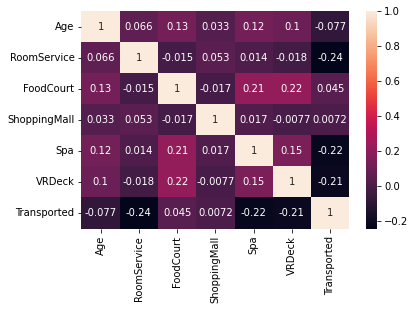

In [25]:
# correlation analysis
corr_df = train.corr(method='pearson')
sns.heatmap(data=corr_df, annot=True)